# Credit Card Fraud Detection

**Objective**:
The goal of this project is to build a machine learning model that detects fraudulent credit card transactions. By analyzing transaction patterns, the model classifies transactions as either **fraudulent (1)** or **legitimate (0)** to enhance financial security and prevent fraud losses.

Since fraud detection is a high-risk problem where **False Negatives** (missed fraud cases) can lead to severe financial loss, the focus is on maximizing the **recall score** to correctly identify fraudulent transactions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve

import imblearn.over_sampling as os
import imblearn.under_sampling as us

import optuna


In [2]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize']=[7,3]

In [3]:
df = pd.read_csv('G:/Study material/Data Science/Projects/Credit Card fraud detection/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

* Data contains 284807 records and 31 coulumns including target column.
* Our goal is to identify the fraud transactions.

## Problem Statement

Create a predictive model which can identify the fraud transactions.

<b>Traget Variable</b>: Class
    
## Type of machine learning

Looking at the problem statement and data, we can use supervised classification models to identify fraud transactions.

## Basic data exploration

* Check the datatypes of features
* Identify which features are quantitative, categorical and qualitative
* Remove useless features

## Datatypes

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Missing Value Imputations

In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Feature Scaling

* All features are scaled except `Amount` and `Time`

In [8]:
std = StandardScaler()

df['scaled_amount'] = std.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## Data imbalance check

In [10]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

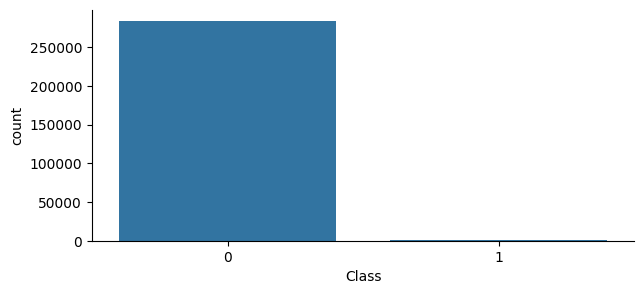

In [11]:
sns.countplot(x=df["Class"])

sns.despine()

* Data is imbalanced. Most of the transactions are non-fraud.
* We have to balance the data for accurate prediction.

In [12]:
print(f"Non-Fraud transactions are {round((df['Class'].value_counts()[0] / len(df))*100,2)}% of the dataset")
print(f"Fraud transactions are {round((df['Class'].value_counts()[1] / len(df))*100,2)}% of the dataset")

Non-Fraud transactions are 99.83% of the dataset
Fraud transactions are 0.17% of the dataset


* There are only 0.17% of transactions are fruad.
* Our model will give 99.83% accurecy without predicting any fruad transactions.
* We can't use accurecy metrix for imbalance data. We have to use **Precision** or **Recall** 

### Different techniques to handle Imbalanced data.
 
 1. We will use different matrics and will change the threshold value of prediction by using `predict_proba` method. 
 2. We will use different imbalance data techniques such as **Oversampling**, **Undersamping**, **SMOTE**.
 3. We will pass the `class_balance` parameter to balance the data.
 
 We will use all these five techniques and whichever technique gives best prediction we will select that technique.

## Why we shouldn't delete outliers in this case

* Most of the outliers are fraud transactions therefore we can't remove or treat outlietrs.

## Split the data

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

In [14]:
y_train.value_counts()

Class
0    227451
1       394
Name: count, dtype: int64

In [15]:
y_test.value_counts()

Class
0    56864
1       98
Name: count, dtype: int64

In this project, we are more focusing on **recall_score** because we have high risk of **False Positive**. It means,incorrectly predicting fraud transaction as genuine transaction.

## Modeling without treating imbalance data

### Logistic Regression

In [22]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
print(f'Training Accurecy : {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, lr.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, lr.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, lr.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, lr.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, lr.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, lr.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, lr.predict(X_test))}')

Training Accurecy : 0.9992319339902126
Test Accurecy : 0.9991222218320986
Training precision : 0.8953068592057761
Test precision : 0.8636363636363636
Training recall : 0.6294416243654822
Test recall : 0.5816326530612245
Training f1_score : 0.7391952309985096
Test f_score : 0.6951219512195121


<Axes: >

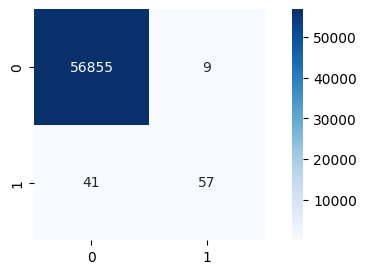

In [24]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot=True,
           fmt = 'g', 
           cmap="Blues",
           square=True)

* Here `False Negative` values are high which means some of the fraud transactions are predicting as a non-fraud transactions.

In [25]:
lr_accuracy = accuracy_score(y_test, lr.predict(X_test)).round(4)
lr_precision = precision_score(y_test, lr.predict(X_test)).round(4)
lr_recall = recall_score(y_test, lr.predict(X_test)).round(4)
lr_f1_score = f1_score(y_test, lr.predict(X_test)).round(4)

lr_scores = [(lr_accuracy, lr_precision, lr_recall, lr_f1_score)]

lr_scores = pd.DataFrame(data = lr_scores, columns=['Accurecy','Precision','Recall','F1_score'])

lr_scores.insert(0, 'Logistic Regresion','Original data')

lr_scores

,Logistic Regresion,Accurecy,Precision,Recall,F1_score
0,Original data,0.9991,0.8636,0.5816,0.6951


### Random Forest

In [26]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
print(f'Training Accurecy : {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, rf.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, rf.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, rf.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, rf.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, rf.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, rf.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, rf.predict(X_test))}')

Training Accurecy : 1.0
Test Accurecy : 0.9995962220427653
Training precision : 1.0
Test precision : 0.9629629629629629
Training recall : 1.0
Test recall : 0.7959183673469388
Training f1_score : 1.0
Test f_score : 0.871508379888268


<Axes: >

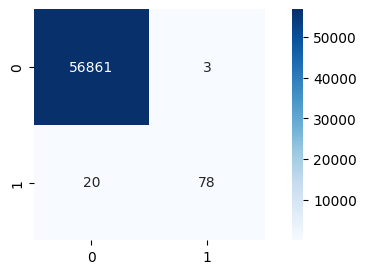

In [28]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), annot=True,
           fmt = 'g', 
           cmap="Blues",
           square=True)

* Here `False Negative` values are high which means some of the fraud transactions are predicting as a non-fraud transactions.
* `RandomForestClassifier` giving better prediction than `Logistic Regression`.

* <b>LogisticRegression</b>: `recall_score` for test is 0.58 which is very low.
* <b>RandomForestClassifer</b>: `recall_score` for test is 0.77 which is low.
    
We will try to improve recall score by applying different imbalance techniques.

## Training models using different metrics and changing threshold value of prediction.

* We will use `recall` score here to predict the output because here risk of `false positive` is high.
* <b>False Positive</b>: Predicting fraud transaction as non-fraud.

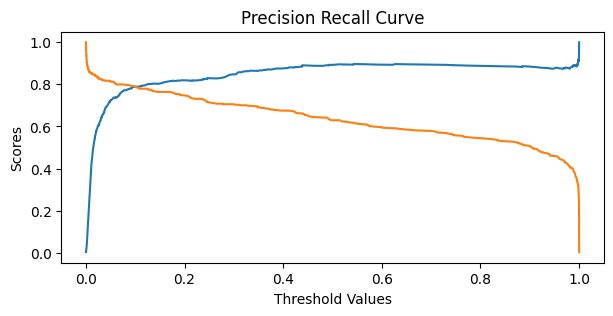

In [29]:
## Ploting precision_recall_curve

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

plt.plot(t_curve, p_curve[:-1], label='precision_score')
plt.plot(t_curve, r_curve[:-1], label='recall_score')
plt.title('Precision Recall Curve')
plt.xlabel('Threshold Values')
plt.ylabel('Scores')
plt.show()

* When threshold values increasing, precision values also increasing.
* When threshold values increasing , recall values decreasing.
* To increase our recall value, we have to keep our threshold less than 0.5.
* We will check highest f1_score and will calculate precision and recall score for that threshold value.

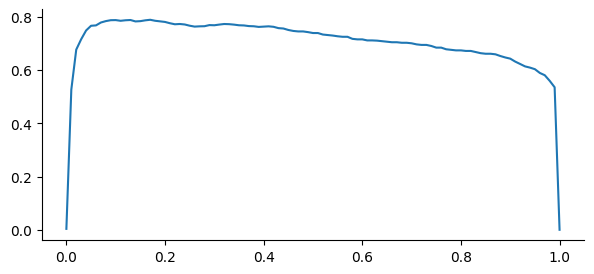

In [30]:
f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    score = f1_score(y_train, lr.predict_proba(X_train)[:,1]>thresh)
    f1.append(score)
    
sns.lineplot(x= thresholds, y=f1)
sns.despine()

In [31]:
thresh = thresholds[f1.index(max(f1))]
thresh

0.17

* We will use this threshold value to train our models.

### Logistic Regression

In [32]:
lr_thresh = LogisticRegression()

lr_thresh.fit(X_train, y_train)

LogisticRegression()

In [33]:
print(f'Training Accurecy : {accuracy_score(y_train, lr_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test Accurecy : {accuracy_score(y_test, lr_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training precision : {precision_score(y_train, lr_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test precision : {precision_score(y_test, lr_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training recall : {recall_score(y_train, lr_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test recall : {recall_score(y_test, lr_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training f1_score : {f1_score(y_train, lr_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test f_score : {f1_score(y_test, lr_thresh.predict_proba(X_test)[:,1] > thresh)}')

Training Accurecy : 0.9992933792709956
Test Accurecy : 0.9992099996488887
Training precision : 0.8157181571815718
Test precision : 0.8117647058823529
Training recall : 0.7639593908629442
Test recall : 0.7040816326530612
Training f1_score : 0.7889908256880733
Test f_score : 0.7540983606557378


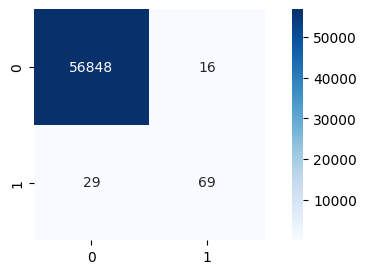

In [34]:
sns.heatmap(confusion_matrix(y_test, lr_thresh.predict_proba(X_test)[:,1] > thresh),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

In [35]:
lr_thresh_accuracy = accuracy_score(y_test, lr_thresh.predict(X_test)).round(4)
lr_thresh_precision = precision_score(y_test, lr_thresh.predict(X_test)).round(4)
lr_thresh_recall = recall_score(y_test, lr_thresh.predict(X_test)).round(4)
lr_thresh_f1_score = f1_score(y_test, lr_thresh.predict(X_test)).round(4)

lr_thresh_scores = [(lr_thresh_accuracy, lr_thresh_precision, lr_thresh_recall, lr_thresh_f1_score)]

lr_thresh_scores = pd.DataFrame(data = lr_thresh_scores, columns=['Accurecy','Precision','Recall','F1_score'])

lr_thresh_scores.insert(0, 'Logistic Regresion','Change prediction threshold')

lr_thresh_scores

,Logistic Regresion,Accurecy,Precision,Recall,F1_score
0,Change prediction threshold,0.9991,0.8636,0.5816,0.6951


### Random Forest

In [36]:
rf_thresh = RandomForestClassifier(n_estimators = 100, max_depth = 10)

rf_thresh.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [37]:
print(f'Training Accurecy : {accuracy_score(y_train, rf_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test Accurecy : {accuracy_score(y_test, rf_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training precision : {precision_score(y_train, rf_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test precision : {precision_score(y_test, rf_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training recall : {recall_score(y_train, rf_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test recall : {recall_score(y_test, rf_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training f1_score : {f1_score(y_train, rf_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test f_score : {f1_score(y_test, rf_thresh.predict_proba(X_test)[:,1] > thresh)}')

Training Accurecy : 0.9996532730584389
Test Accurecy : 0.999385555282469
Training precision : 0.9315068493150684
Test precision : 0.8058252427184466
Training recall : 0.8629441624365483
Test recall : 0.8469387755102041
Training f1_score : 0.8959156785243741
Test f_score : 0.8258706467661691


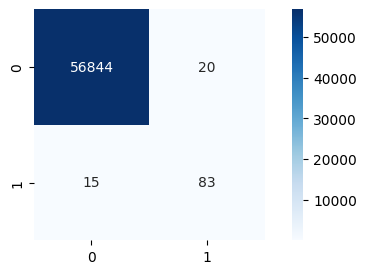

In [38]:
sns.heatmap(confusion_matrix(y_test, rf_thresh.predict_proba(X_test)[:,1] > thresh),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

### Hyperparameter optimization using Optuna


In [39]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    model = RandomForestClassifier(n_estimators = n_estimators,
                                  max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf)
    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='recall', n_jobs=-1)
    recall = score.mean()
    return recall

In [40]:
# study = optuna.create_study(direction='maximize')

# study.optimize(objective, n_trials=50)

### Gradient Boosting Classifier

In [41]:
gbc_thresh = GradientBoostingClassifier(random_state = 42)

gbc_thresh.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [42]:
print(f'Training Accurecy : {accuracy_score(y_train, gbc_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test Accurecy : {accuracy_score(y_test, gbc_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training precision : {precision_score(y_train, gbc_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test precision : {precision_score(y_test, gbc_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training recall : {recall_score(y_train, gbc_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test recall : {recall_score(y_test, gbc_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training f1_score : {f1_score(y_train, gbc_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test f_score : {f1_score(y_test, gbc_thresh.predict_proba(X_test)[:,1] > thresh)}')

Training Accurecy : 0.9992187671443306
Test Accurecy : 0.9990695551420246
Training precision : 0.8333333333333334
Test precision : 0.7472527472527473
Training recall : 0.6852791878172588
Test recall : 0.6938775510204082
Training f1_score : 0.7520891364902508
Test f_score : 0.7195767195767196


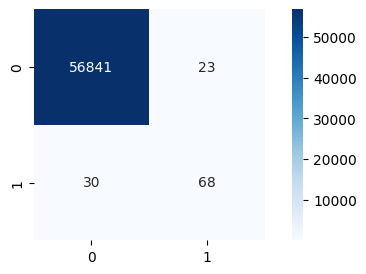

In [43]:
sns.heatmap(confusion_matrix(y_test, gbc_thresh.predict_proba(X_test)[:,1] > thresh),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

### Ada Boost

In [44]:
ab_thresh = AdaBoostClassifier()

ab_thresh.fit(X_train, y_train)

AdaBoostClassifier()

In [45]:
print(f'Training Accurecy : {accuracy_score(y_train, ab_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test Accurecy : {accuracy_score(y_test, ab_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training precision : {precision_score(y_train, ab_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test precision : {precision_score(y_test, ab_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training recall : {recall_score(y_train, ab_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test recall : {recall_score(y_test, ab_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training f1_score : {f1_score(y_train, ab_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test f_score : {f1_score(y_test, ab_thresh.predict_proba(X_test)[:,1] > thresh)}')

Training Accurecy : 0.011437600122890561
Test Accurecy : 0.01192022752010112
Training precision : 0.0017461984727411327
Test precision : 0.0017381742076231354
Training recall : 1.0
Test recall : 1.0
Training f1_score : 0.003486309157755489
Test f_score : 0.0034703164007861323


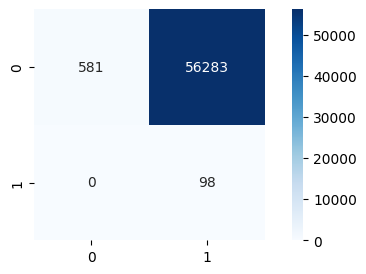

In [46]:
sns.heatmap(confusion_matrix(y_test, ab_thresh.predict_proba(X_test)[:,1] > thresh),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

### KNN

In [47]:
knn_thresh = KNeighborsClassifier(n_neighbors = 5)

knn_thresh.fit(X_train, y_train)

KNeighborsClassifier()

In [48]:
print(f'Training Accurecy : {accuracy_score(y_train, knn_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test Accurecy : {accuracy_score(y_test, knn_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training precision : {precision_score(y_train, knn_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test precision : {precision_score(y_test, knn_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training recall : {recall_score(y_train, knn_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test recall : {recall_score(y_test, knn_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training f1_score : {f1_score(y_train, knn_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test f_score : {f1_score(y_test, knn_thresh.predict_proba(X_test)[:,1] > thresh)}')

Training Accurecy : 0.999174877658057
Test Accurecy : 0.99875355500158
Training precision : 0.6769759450171822
Test precision : 0.5944055944055944
Training recall : 1.0
Test recall : 0.8673469387755102
Training f1_score : 0.8073770491803279
Test f_score : 0.7053941908713693


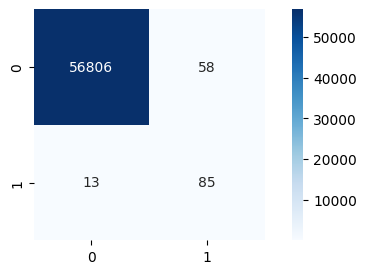

In [49]:
sns.heatmap(confusion_matrix(y_test, knn_thresh.predict_proba(X_test)[:,1] > thresh),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

* After changing threshold value to **0.17**, we are getting better scores for all the models.
* `Random Forest` is predicting the best output.
* We are getting the highest `f1_score` for Random Forest model.

## Sampling Methods for imblance data

## Under Sampling

* In this method, you randomly reduce the number of samples from the majority class to balance it with the minority class.
* You keep all the minority class samples and randomly remove some samples from the majority class to match the number of minority class samples.
* You lose potentially useful information from the majority class, which could hurt model performance.

In [50]:
rus = us.RandomUnderSampler(sampling_strategy= 0.02,
                           random_state=42)

X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

lr_us = LogisticRegression()

lr_us.fit(X_train_us, y_train_us)

LogisticRegression()

In [51]:
print(f'Training Accurecy : {accuracy_score(y_train, lr_us.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, lr_us.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, lr_us.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, lr_us.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, lr_us.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, lr_us.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, lr_us.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, lr_us.predict(X_test))}')

Training Accurecy : 0.9989027628431609
Test Accurecy : 0.9990168884519505
Training precision : 0.642292490118577
Test precision : 0.6810344827586207
Training recall : 0.8248730964467005
Test recall : 0.8061224489795918
Training f1_score : 0.7222222222222222
Test f_score : 0.7383177570093458


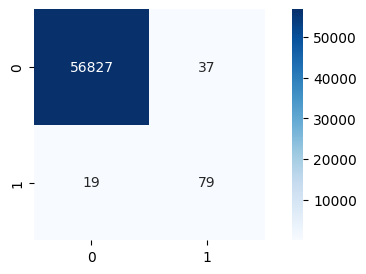

In [52]:
sns.heatmap(confusion_matrix(y_test, lr_us.predict(X_test)),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

In [53]:
rf_us = RandomForestClassifier(n_estimators = 100, max_depth = 10)

rf_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=10)

In [54]:
print(f'Training Accurecy : {accuracy_score(y_train, rf_us.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, rf_us.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, rf_us.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, rf_us.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, rf_us.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, rf_us.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, rf_us.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, rf_us.predict(X_test))}')

Training Accurecy : 0.9992538787333495
Test Accurecy : 0.9991397773954567
Training precision : 0.75
Test precision : 0.7058823529411765
Training recall : 0.8527918781725888
Test recall : 0.8571428571428571
Training f1_score : 0.7980997624703089
Test f_score : 0.7741935483870968


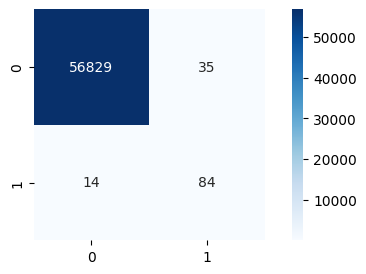

In [55]:
sns.heatmap(confusion_matrix(y_test, rf_us.predict(X_test)),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

## Over Sampling

* This technique increases the number of samples in the minority class by duplicating existing samples.
* Randomly select samples from the minority class and duplicate them until the class sizes are balanced.
* Keeps all the information from both classes (no data is lost).
* Can lead to overfitting, as the model may memorize duplicated samples from the minority class.

In [56]:
n_pos = y_train.sum()
n_neg = len(y_train) - n_pos

ratio = {1:n_pos*8, 0:n_neg}

ros = os.RandomOverSampler(sampling_strategy= ratio,
                           random_state=42)

X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

lr_os = LogisticRegression()

lr_os.fit(X_train_os, y_train_os)

LogisticRegression()

In [57]:
print(f'Training Accurecy : {accuracy_score(y_train, lr_os.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, lr_os.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, lr_os.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, lr_os.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, lr_os.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, lr_os.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, lr_os.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, lr_os.predict(X_test))}')

Training Accurecy : 0.9993153240141324
Test Accurecy : 0.9993328885923949
Training precision : 0.7931034482758621
Test precision : 0.8061224489795918
Training recall : 0.817258883248731
Test recall : 0.8061224489795918
Training f1_score : 0.8050000000000002
Test f_score : 0.806122448979592


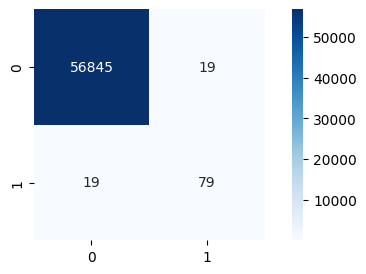

In [58]:
sns.heatmap(confusion_matrix(y_test, lr_os.predict(X_test)),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

In [59]:
n_pos = y_train.sum()
n_neg = len(y_train) - n_pos

ratio = {1:n_pos*8, 0:n_neg}

ros = os.RandomOverSampler(sampling_strategy= ratio,
                           random_state=42)

X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

rf_os = RandomForestClassifier(n_estimators = 100, max_depth = 10)

rf_os.fit(X_train_os, y_train_os)

RandomForestClassifier(max_depth=10)

In [60]:
print(f'Training Accurecy : {accuracy_score(y_train, rf_os.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, rf_os.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, rf_os.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, rf_os.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, rf_os.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, rf_os.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, rf_os.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, rf_os.predict(X_test))}')

Training Accurecy : 0.9997103293905945
Test Accurecy : 0.9995611109160493
Training precision : 0.9739884393063584
Test precision : 0.9397590361445783
Training recall : 0.8553299492385786
Test recall : 0.7959183673469388
Training f1_score : 0.910810810810811
Test f_score : 0.8618784530386742


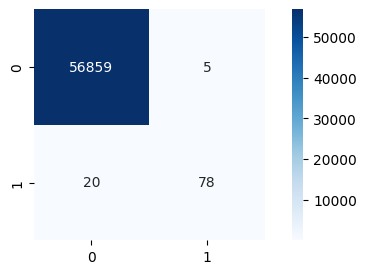

In [61]:
sns.heatmap(confusion_matrix(y_test, rf_os.predict(X_test)),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

## SMOTE

* SMOTE creates synthetic samples for the minority class by generating new, similar data points.
* It creates new samples by interpolating between existing samples in the minority class. Instead of duplicating samples, it generates new synthetic ones that are similar to the existing minority class samples.
* Helps to avoid overfitting since new synthetic samples are created rather than duplicating existing ones.
* May introduce noise or unrealistic samples, especially if the data is complex.

In [62]:
n_pos = y_train.sum()
n_neg = len(y_train) - n_pos

ratio = {1:n_pos*8, 0:n_neg}

sm = os.SMOTE(sampling_strategy= ratio,
                           random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

lr_sm = LogisticRegression()

lr_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [63]:
print(f'Training Accurecy : {accuracy_score(y_train, lr_sm.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, lr_sm.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, lr_sm.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, lr_sm.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, lr_sm.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, lr_sm.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, lr_sm.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, lr_sm.predict(X_test))}')

Training Accurecy : 0.9993109350655051
Test Accurecy : 0.9992977774656788
Training precision : 0.794044665012407
Test precision : 0.7959183673469388
Training recall : 0.8121827411167513
Test recall : 0.7959183673469388
Training f1_score : 0.8030112923462986
Test f_score : 0.7959183673469388


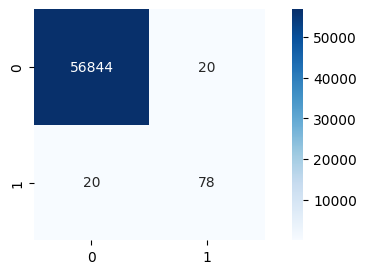

In [64]:
sns.heatmap(confusion_matrix(y_test, lr_sm.predict(X_test)),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

In [65]:
n_pos = y_train.sum()
n_neg = len(y_train) - n_pos

ratio = {1:n_pos*8, 0:n_neg}

sm = os.SMOTE(sampling_strategy= ratio,
                           random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

rf_sm = RandomForestClassifier(n_estimators = 100, max_depth = 10)

rf_sm.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=10)

In [66]:
print(f'Training Accurecy : {accuracy_score(y_train, rf_sm.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, rf_sm.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, rf_sm.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, rf_sm.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, rf_sm.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, rf_sm.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, rf_sm.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, rf_sm.predict(X_test))}')

Training Accurecy : 0.9996971625447124
Test Accurecy : 0.9995962220427653
Training precision : 0.9765395894428153
Test precision : 0.9310344827586207
Training recall : 0.8451776649746193
Test recall : 0.826530612244898
Training f1_score : 0.9061224489795918
Test f_score : 0.8756756756756757


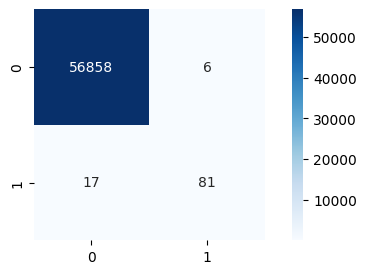

In [67]:
sns.heatmap(confusion_matrix(y_test, rf_sm.predict(X_test)),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

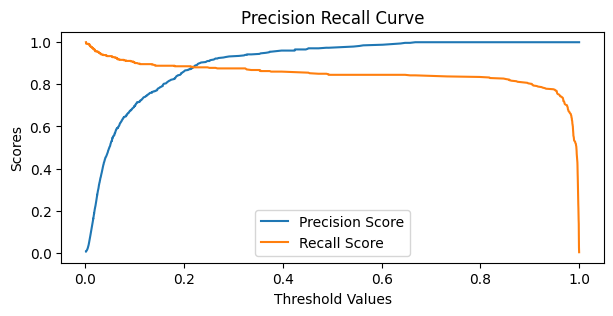

In [68]:
## precision and recall curve

p_curve, r_curve, t_curve = precision_recall_curve(y_train, rf_sm.predict_proba(X_train)[:,1])

plt.plot(t_curve, p_curve[:-1], label="Precision Score")
plt.plot(t_curve, r_curve[:-1], label="Recall Score")
plt.title("Precision Recall Curve")
plt.xlabel("Threshold Values")
plt.ylabel("Scores")
plt.legend()
plt.show()

In [69]:
f1 = []
thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_preb = rf_sm.predict_proba(X_train)[:,1] > thresh
    score = f1_score(y_train, y_preb)
    f1.append(score)

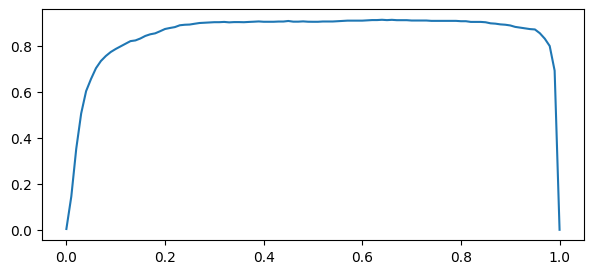

In [70]:
sns.lineplot(x=thresholds, y=f1)
plt.show()

In [71]:
# thresh = thresholds[f1.index(max(f1))]
thresh = 0.2

In [72]:
rf_sm_thresh = RandomForestClassifier(n_estimators=100, max_depth=10)

rf_sm_thresh.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [73]:
print(f'Training Accurecy : {accuracy_score(y_train, rf_sm_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test Accurecy : {accuracy_score(y_test, rf_sm_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training precision : {precision_score(y_train, rf_sm_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test precision : {precision_score(y_test, rf_sm_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training recall : {recall_score(y_train, rf_sm_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test recall : {recall_score(y_test, rf_sm_thresh.predict_proba(X_test)[:,1] > thresh)}')
print(f'Training f1_score : {f1_score(y_train, rf_sm_thresh.predict_proba(X_train)[:,1] > thresh)}')
print(f'Test f_score : {f1_score(y_test, rf_sm_thresh.predict_proba(X_test)[:,1] > thresh)}')

Training Accurecy : 0.9996839956988304
Test Accurecy : 0.9994557775359011
Training precision : 0.952247191011236
Test precision : 0.8383838383838383
Training recall : 0.8604060913705583
Test recall : 0.8469387755102041
Training f1_score : 0.9039999999999999
Test f_score : 0.8426395939086294


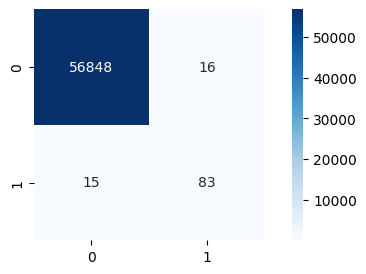

In [74]:
sns.heatmap(confusion_matrix(y_test, rf_sm_thresh.predict_proba(X_test)[:,1]>thresh),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

## Class Weight

* Instead of resampling the data, you assign different importance (or "weight") to each class during model training.
* You can adjust the class_weight parameter to give more importance to the minority class. The algorithm then pays more attention to the minority class when learning from the data.
* No data is removed or added, so you avoid overfitting and loss of information.
* It might not always be as effective as resampling techniques, especially for highly imbalanced datasets.

In [75]:
ratio = {0: 1, 1: 8}

lr_balance = LogisticRegression(class_weight = ratio)

lr_balance.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 8})

In [76]:
print(f'Training Accurecy : {accuracy_score(y_train, lr_balance.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, lr_balance.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, lr_balance.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, lr_balance.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, lr_balance.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, lr_balance.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, lr_balance.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, lr_balance.predict(X_test))}')

Training Accurecy : 0.999297768219623
Test Accurecy : 0.9993328885923949
Training precision : 0.7853658536585366
Test precision : 0.8061224489795918
Training recall : 0.817258883248731
Test recall : 0.8061224489795918
Training f1_score : 0.8009950248756219
Test f_score : 0.806122448979592


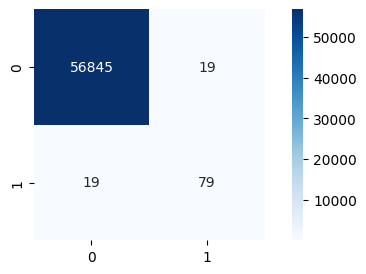

In [77]:
sns.heatmap(confusion_matrix(y_test, lr_balance.predict(X_test)),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

### Random Forest

In [78]:
rf_balance = RandomForestClassifier(class_weight = ratio)

rf_balance.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 8})

In [79]:
print(f'Training Accurecy : {accuracy_score(y_train, rf_balance.predict(X_train))}')
print(f'Test Accurecy : {accuracy_score(y_test, rf_balance.predict(X_test))}')
print(f'Training precision : {precision_score(y_train, rf_balance.predict(X_train))}')
print(f'Test precision : {precision_score(y_test, rf_balance.predict(X_test))}')
print(f'Training recall : {recall_score(y_train, rf_balance.predict(X_train))}')
print(f'Test recall : {recall_score(y_test, rf_balance.predict(X_test))}')
print(f'Training f1_score : {f1_score(y_train, rf_balance.predict(X_train))}')
print(f'Test f_score : {f1_score(y_test, rf_balance.predict(X_test))}')

Training Accurecy : 0.9999956110513727
Test Accurecy : 0.9995611109160493
Training precision : 1.0
Test precision : 0.9866666666666667
Training recall : 0.9974619289340102
Test recall : 0.7551020408163265
Training f1_score : 0.9987293519695045
Test f_score : 0.8554913294797689


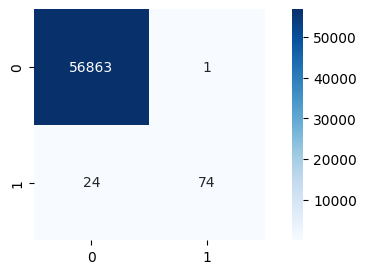

In [80]:
sns.heatmap(confusion_matrix(y_test, rf_balance.predict(X_test)),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

In [81]:
thresh_balance_rf = 0.18

In [82]:
print(f'Training Accurecy : {accuracy_score(y_train, rf_sm_thresh.predict_proba(X_train)[:,1] > thresh_balance_rf)}')
print(f'Test Accurecy : {accuracy_score(y_test, rf_sm_thresh.predict_proba(X_test)[:,1] > thresh_balance_rf)}')
print(f'Training precision : {precision_score(y_train, rf_sm_thresh.predict_proba(X_train)[:,1] > thresh_balance_rf)}')
print(f'Test precision : {precision_score(y_test, rf_sm_thresh.predict_proba(X_test)[:,1] > thresh_balance_rf)}')
print(f'Training recall : {recall_score(y_train, rf_sm_thresh.predict_proba(X_train)[:,1] > thresh_balance_rf)}')
print(f'Test recall : {recall_score(y_test, rf_sm_thresh.predict_proba(X_test)[:,1] > thresh_balance_rf)}')
print(f'Training f1_score : {f1_score(y_train, rf_sm_thresh.predict_proba(X_train)[:,1] > thresh_balance_rf)}')
print(f'Test f_score : {f1_score(y_test, rf_sm_thresh.predict_proba(X_test)[:,1] > thresh_balance_rf)}')

Training Accurecy : 0.999679606750203
Test Accurecy : 0.9994382219725431
Training precision : 0.9495798319327731
Test precision : 0.83
Training recall : 0.8604060913705583
Test recall : 0.8469387755102041
Training f1_score : 0.9027962716378163
Test f_score : 0.8383838383838385


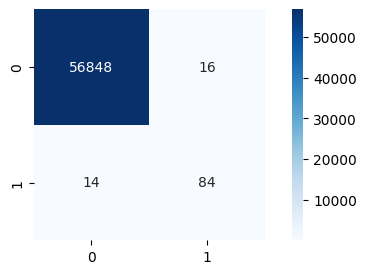

In [83]:
sns.heatmap(confusion_matrix(y_test, rf_balance.predict_proba(X_test)[:,1] > thresh_balance_rf),
           annot = True,
           fmt = 'g',
           square = True,
           cmap = 'Blues');

We got the best prediction for the **Random Forest model** after adjusting a `class_weight` parameter `threshold value` 

* In our test data there were 98 fraud transactions and out of those we are able to identify 84 correctly. 
* In this project, we are try to maximize `recall_score` because here we have high risk of predicting fraud transaction as a genuine transaction. For the **Random Forest Model** we got the best `recall_score`.